# taxi time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
# Pretty display for notebooks
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(1458644, 11)

In [4]:
df.head(2000)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [5]:
import gpxpy.geo

# Point one
lat1 = 52.2296756
lon1 = 21.0122287

# Point two
lat2 = 52.406374
lon2 = 16.9251681

# What you were looking for
dist = gpxpy.geo.haversine_distance(lat1, lon1, lat2, lon2)
print(dist)

278458.175075


In [6]:
def cal_dis(x):
    dist = gpxpy.geo.haversine_distance(x['pickup_longitude'], x['pickup_latitude'],
                                        x['dropoff_longitude'],x['dropoff_latitude'])
    return dist    

In [7]:
df['dist'] = df.apply(cal_dis, axis=1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

df['dist'] = scaler.fit_transform(df['dist'])

/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [9]:
df['pickup_datetime'][0]

'2016-03-14 17:24:55'

In [10]:
from datetime import datetime
datestring = df['pickup_datetime'][0]
dt = datetime.strptime(datestring, '%Y-%m-%d %H:%M:%S')
print dt.year, dt.month, dt.day


2016 3 14


In [11]:
def get_year( time_string):
    dt = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return dt.year
    

In [12]:
def get_month( time_string):
    dt = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return str(dt.month)

In [13]:
def get_day( time_string):
    dt = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return dt.day

In [14]:
df['pickup_year'] = df['pickup_datetime'].apply(get_year)

In [15]:
np.unique(df['pickup_year'])

array([2016])

In [16]:
df['pickup_month'] = df['pickup_datetime'].apply(get_month)

In [17]:
np.unique(df.pickup_month)

array(['1', '2', '3', '4', '5', '6'], dtype=object)

In [18]:
df['pickup_day'] = df['pickup_datetime'].apply(get_day)

In [19]:
datetime.strptime(df['pickup_datetime'][100], '%Y-%m-%d %H:%M:%S').strftime('%A')

'Wednesday'

In [20]:
def get_week_day( time_string):
    week_day = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S').strftime('%A')
    return week_day

In [21]:
df['pickup_week_day'] = df['pickup_datetime'].apply(get_week_day)

In [22]:
df['pickup_day'].head(5)

0    14
1    12
2    19
3     6
4    26
Name: pickup_day, dtype: int64

In [23]:
df_small = df[['vendor_id','passenger_count','trip_duration']]

In [24]:
np.unique(df_small.vendor_id)

array([1, 2])

In [25]:
np.unique(df_small.passenger_count)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

{'boxes': [<matplotlib.lines.Line2D at 0x7f58c01c3f50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5845500390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f584550c690>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f584550c050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5851761650>,
  <matplotlib.lines.Line2D at 0x7f5851761d10>]}

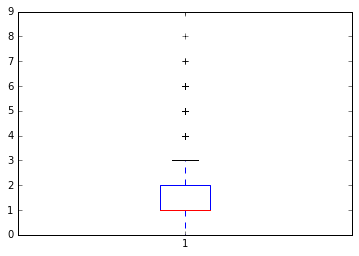

In [26]:
plt.boxplot(df_small['passenger_count'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f58c01c3f10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5845406050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f584540f350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5845406cd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f58516ad310>,
  <matplotlib.lines.Line2D at 0x7f58516ad9d0>]}

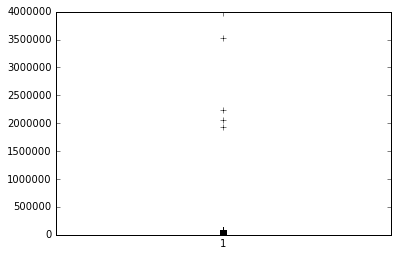

In [27]:
plt.boxplot(df_small['trip_duration'])


(array([  1.45658900e+06,   7.00000000e+01,   5.00000000e+01,
          1.93100000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

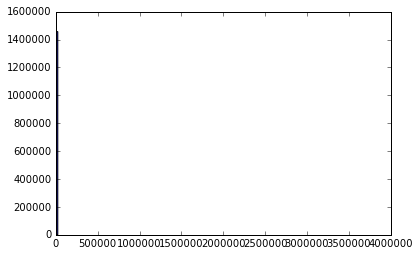

In [28]:
plt.hist(df_small['trip_duration'], bins =150)

In [29]:
df_small['trip_duration'].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [30]:
trip_duration_q2=np.percentile(df_small.trip_duration.values,2)

In [31]:
trip_duration_q98=np.percentile(df_small.trip_duration.values,98)

In [32]:
df_small_wo_outlier = df_small [ np.logical_and (df_small.trip_duration >trip_duration_q2 
          , df_small.trip_duration <trip_duration_q98)]

(array([ 11382.,  13370.,  16056.,  17768.,  19593.,  21454.,  22391.,
         24362.,  24697.,  25755.,  25772.,  26745.,  26681.,  27271.,
         26818.,  26806.,  27118.,  26541.,  26568.,  26037.,  25909.,
         25269.,  24972.,  24646.,  24210.,  23620.,  23155.,  22657.,
         22037.,  21524.,  22301.,  20564.,  20058.,  19620.,  18860.,
         18596.,  17850.,  17431.,  17103.,  16474.,  16301.,  15565.,
         15473.,  14804.,  14213.,  13931.,  13486.,  13225.,  12777.,
         12090.,  11886.,  11555.,  11205.,  10598.,  10452.,  10183.,
          9857.,   9824.,   9244.,   9025.,   9164.,   8523.,   8018.,
          7931.,   7651.,   7347.,   7040.,   6888.,   6822.,   6395.,
          6413.,   6151.,   5902.,   5693.,   5574.,   5497.,   5203.,
          5126.,   4941.,   4795.,   4569.,   4393.,   4305.,   4080.,
          4072.,   3710.,   3709.,   3650.,   3593.,   3670.,   3287.,
          3180.,   3109.,   2960.,   2925.,   2880.,   2795.,   2666.,
      

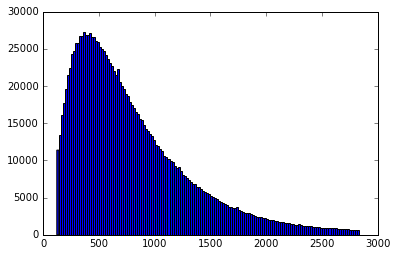

In [33]:
plt.hist(df_small_wo_outlier['trip_duration'], bins =150)

(array([  1659.,   1647.,   1142.,   1818.,   2007.,   1824.,   1976.,
          2065.,   2131.,   2247.,   2244.,   3195.,   2449.,   2530.,
          3531.,   2763.,   3625.,   3761.,   2974.,   4015.,   3862.,
          4034.,   4216.,   5475.,   4350.,   4291.,   5820.,   4743.,
          5989.,   6054.,   6050.,   6146.,   6283.,   6389.,   6643.,
          8227.,   6806.,   8023.,   6980.,   8300.,   8516.,   8516.,
         10058.,   8629.,   9937.,   8660.,  10517.,  10288.,  10129.,
         10494.,  11998.,  10620.,  12182.,  12032.,  11889.,  11800.,
         11947.,  13401.,  13705.,  13354.,  13323.,  13397.,  13201.,
         14670.,  14513.,  14471.,  14282.,  15598.,  15289.,  15409.,
         15241.,  14906.,  16301.,  15959.,  15819.,  16722.,  15348.,
         16218.,  17197.,  15597.,  16755.,  16313.,  17057.,  15912.,
         16410.,  17267.,  15681.,  16354.,  16867.,  15526.,  16126.,
         16620.,  16252.,  15862.,  15351.,  15801.,  15826.,  14691.,
      

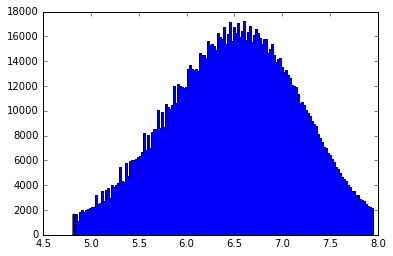

In [34]:
plt.hist(np.log(df_small_wo_outlier['trip_duration'].values), bins =150)

In [35]:
np.unique(df.store_and_fwd_flag)

array(['N', 'Y'], dtype=object)

In [36]:
df[df['store_and_fwd_flag']=="Y"].trip_duration.describe()

count    8045.000000
mean     1080.763331
std       925.645317
min         2.000000
25%       455.000000
50%       812.000000
75%      1400.000000
max      9984.000000
Name: trip_duration, dtype: float64

(array([  4.82600000e+03,   2.13500000e+03,   6.95000000e+02,
          2.51000000e+02,   9.20000000e+01,   3.30000000e+01,
          1.00000000e+01,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  2.00000000e+00,   1.00020000e+03,   1.99840000e+03,
          2.99660000e+03,   3.99480000e+03,   4.99300000e+03,
          5.99120000e+03,   6.98940000e+03,   7.98760000e+03,
          8.98580000e+03,   9.98400000e+03]),
 <a list of 10 Patch objects>)

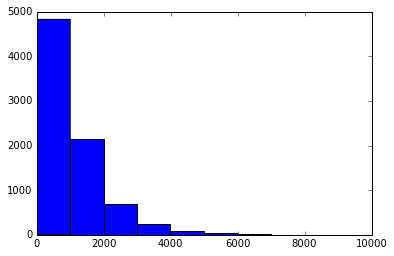

In [37]:
plt.hist(df[df['store_and_fwd_flag']=="Y"].trip_duration)

In [38]:
df[df['store_and_fwd_flag']=="N"].trip_duration.describe()

count    1.450599e+06
mean     9.588197e+02
std      5.251475e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.074000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [42]:
df.columns

Index([u'id', u'vendor_id', u'pickup_datetime', u'dropoff_datetime',
       u'passenger_count', u'pickup_longitude', u'pickup_latitude',
       u'dropoff_longitude', u'dropoff_latitude', u'store_and_fwd_flag',
       u'trip_duration', u'dist', u'pickup_year', u'pickup_month',
       u'pickup_day', u'pickup_week_day'],
      dtype='object')

In [43]:
df_selected = df[['vendor_id','passenger_count',
                  'store_and_fwd_flag','pickup_month','pickup_day',
                  'pickup_week_day','trip_duration','dist']]

In [44]:
feature = df_selected[['vendor_id','passenger_count',
                  'store_and_fwd_flag','pickup_month',
                  'pickup_week_day','dist']]

In [45]:
X= pd.get_dummies(feature)

In [46]:
X.head(5)

,vendor_id,passenger_count,dist,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,pickup_week_day_Friday,pickup_week_day_Monday,pickup_week_day_Saturday,pickup_week_day_Sunday,pickup_week_day_Thursday,pickup_week_day_Tuesday,pickup_week_day_Wednesday
0,2,1,0.002289,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,1,0.002503,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2,1,0.003943,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,2,1,0.000558,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,2,1,0.000386,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [47]:
y = df_selected.trip_duration

In [48]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)
# Show the results of the split
print X_train.shape
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

(1166915, 18)
Training set has 1166915 samples.
Testing set has 291729 samples.


/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)    
    
    # Return the score
    return score

In [50]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric, greater_is_better=True, 
                              needs_proba=False, needs_threshold=False)
    

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 
    #'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.   
 
    grid= GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)        

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [51]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 3 for the optimal model.


In [52]:
score = performance_metric(y_test, reg.predict(X_test))
print score

0.0215482297262


# test 

In [53]:
df_test = pd.read_csv("test.csv")

In [54]:
df_test.columns

Index([u'id', u'vendor_id', u'pickup_datetime', u'passenger_count',
       u'pickup_longitude', u'pickup_latitude', u'dropoff_longitude',
       u'dropoff_latitude', u'store_and_fwd_flag'],
      dtype='object')

In [55]:
df_test['pickup_month'] = df_test['pickup_datetime'].apply(get_month)
df_test['pickup_week_day'] = df_test['pickup_datetime'].apply(get_week_day)

In [56]:
df_test['dist'] = df_test.apply(cal_dis, axis=1)
scaler = MinMaxScaler() # default=(0, 1)

df_test['dist'] = scaler.fit_transform(df_test['dist'])

/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [57]:
feature_test = df_test[['vendor_id','passenger_count',
                  'store_and_fwd_flag','pickup_month',
                  'pickup_week_day','dist']]

In [58]:
X_test= pd.get_dummies(feature_test)

In [59]:
pred = reg.predict(X_test).astype(int)

In [60]:
submit_format_df = pd.read_csv("sample_submission.csv")

In [61]:
result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])

In [62]:
result_df.head(1)

,trip_duration
id,
id3004672,633


In [63]:
sample_sumission = pd.read_csv("sample_submission.csv")

In [64]:
sample_sumission.head(3)

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959


In [65]:
result_df.to_csv("result1.csv")

##used  RandomForestRegressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [68]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [69]:
pred = regr.predict(X_test).astype(int)

In [71]:
result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])

In [72]:
result_df.to_csv("result2.csv")

# linear regression

In [73]:
from sklearn.linear_model import Ridge

In [74]:
clf = Ridge(alpha=0.5)

In [75]:
regr=clf.fit(X_train, y_train)

In [76]:
pred = regr.predict(X_test).astype(int)

In [77]:
result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])

In [78]:
result_df.to_csv("result3.csv")

#nearest neighbour

In [79]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train) 
pred = neigh.predict(X_test).astype(int)
result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])
result_df.to_csv("result4.csv")